<h1 align="center"> Principal Component Analysis (PCA) </h1>

- Finding latent factors/dimensions underlying large set of correlated variables (grouping similar variables). These components are a resultant of normalized linear combination of original predictor variables (𝑧𝑖1= ∅11𝑥𝑖1+ ∅21𝑥𝑖2+ …)
- These components aim to capture as much information as possible with high explained variance.
- The first component captures the maximum variance followed by second, third and so on.
- The components are orthogonal in nature (and hence uncorrelated).
- Can be used for data summarization, data visualization and in downstream supervised analyses.
- Geometric Representation-1 of Principal Components: directions in feature space along which the original data are highly variable.
- Geometric Representation-2 of Principal Components: lines/sub-spaces in feature space that are as close as possible to the data points.
- Normalizing data becomes extremely important when the predictors are measured in different units.

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load Iris Dataset

In [80]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [81]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [82]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
df.shape

(150, 5)

In [84]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
df.loc[:, features].corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


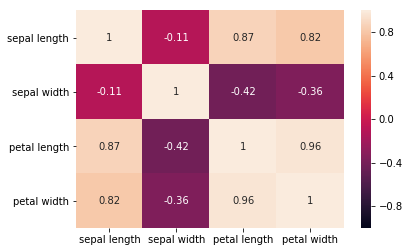

In [85]:
sns.heatmap(df.loc[:, features].corr(),vmin=-1,vmax=1,annot=True)

## Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [29]:
# x = df.loc[:, features].values

In [30]:
# y = df.loc[:,['target']].values

In [86]:
scaler = StandardScaler()
x = scaler.fit_transform(df.loc[:, features])

In [87]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Deciding no. of pricipal components to extract

[Text(0,0.5,'Cumulative Prop. of Variance Explained (%)'),
 Text(0.5,0,'Number of Components')]

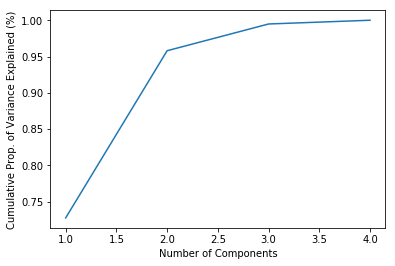

In [88]:
pca = PCA().fit(x)
lp = sns.lineplot(x=range(1,5),y=np.cumsum(pca.explained_variance_ratio_))
lp.set(xlabel='Number of Components',ylabel='Cumulative Prop. of Variance Explained (%)')

## PCA Projection to 2D

In [89]:
# n_components can be set to a fixed integer (to extract that many components), a floating-point no. between 0 & 1 (to extract components that can explain that much % of variance) 
pca = PCA(n_components=2)

In [90]:
# to get principal component scores (to get loading, use components_)
principalComponents = pca.fit_transform(x)

In [91]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [92]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [93]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. Do the classes seem well-separated from each other? 

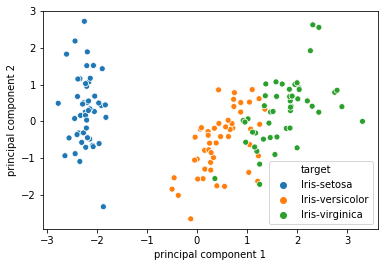

In [94]:
sns.scatterplot(x=finalDf['principal component 1'],y=finalDf['principal component 2'],hue=finalDf['target'])

The three classes appear to be well separated! 

iris-virginica and iris-versicolor could be better separated, but still good!

## Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [95]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset. 

## What are other applications of PCA (other than visualizing data)?

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice. (<b>one of the most common applications</b>)

If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff.

## What are the limitations of PCA? 

- The directions with largest variance are assumed to be of the most interest (if downstream process uses a supervised machine learning technique, the principal components extracted might not be relevant).